In [46]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


In [47]:
df = pd.read_csv(r'C:\Users\G.SRIDEVI\Desktop\pro1\PS_20174392719_1491204439457_log.csv\onlinefraud.csv')


In [48]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [49]:
df.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [50]:
df.shape

(6362620, 11)

In [51]:
df.type.value_counts()

type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [52]:
type=df['type'].value_counts()

In [53]:
transactions=type.index

In [54]:
quantity=type.values

In [55]:

import plotly.express as px
px.pie(df,values=quantity,names=transactions,hole=0.4,title="Distribution of Transaction Type")

In [56]:
df=df.dropna()

In [57]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [58]:
df['isFraud']=df['isFraud'].map({0:'No Fraud',1:'Fraud'})


In [59]:
df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud,0


In [60]:
df['type'].unique()


array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [61]:
#df.replace(to_replace=['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],value=[2,4,1,3,5],inplace=True)

In [62]:
#df

In [63]:
df['type'].value_counts()


type
CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: count, dtype: int64

In [64]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud,0


In [65]:
df['type']=df['type'].map({'PAYMENT':1, 'TRANSFER':4, 'CASH_OUT':2, 'DEBIT':5, 'CASH_IN':3})


In [66]:
df['type'].value_counts()


type
2    2237500
1    2151495
3    1399284
4     532909
5      41432
Name: count, dtype: int64

In [67]:
df


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,1,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,No Fraud,0
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,No Fraud,0
2,1,4,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,Fraud,0
3,1,2,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,Fraud,0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,No Fraud,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,2,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,Fraud,0
6362616,743,4,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,Fraud,0
6362617,743,2,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,Fraud,0
6362618,743,4,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,Fraud,0


In [68]:
df['type'].unique()


array([1, 4, 2, 5, 3], dtype=int64)

In [69]:
df['type'].value_counts()


type
2    2237500
1    2151495
3    1399284
4     532909
5      41432
Name: count, dtype: int64

In [70]:
# Assuming 'isFraud' is the target variable
x = df[['type', 'amount', 'oldbalanceOrg', 'newbalanceOrig', 'step', 'oldbalanceDest', 'newbalanceDest']]



In [71]:
y = df['isFraud']  # Target variable


In [72]:
y


0          No Fraud
1          No Fraud
2             Fraud
3             Fraud
4          No Fraud
             ...   
6362615       Fraud
6362616       Fraud
6362617       Fraud
6362618       Fraud
6362619       Fraud
Name: isFraud, Length: 6362620, dtype: object

In [73]:
# Splitting data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [92]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)


In [74]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [75]:
# List of models
models = [DecisionTreeClassifier(), LogisticRegression(), RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=7)]


In [76]:

# Fit each model in the list
for model in models:
    model.fit(x_train, y_train)


In [77]:
model.score(x_test,y_test)


0.9997296711103287

In [78]:
prediction_input = [[4, 180, 181, 10, 50, 5000, 4500]]


In [79]:
x

,type,amount,oldbalanceOrg,newbalanceOrig,step,oldbalanceDest,newbalanceDest
0,1,9839.64,170136.00,160296.36,1,0.00,0.00
1,1,1864.28,21249.00,19384.72,1,0.00,0.00
2,4,181.00,181.00,0.00,1,0.00,0.00
3,2,181.00,181.00,0.00,1,21182.00,0.00
4,1,11668.14,41554.00,29885.86,1,0.00,0.00
...,...,...,...,...,...,...,...
6362615,2,339682.13,339682.13,0.00,743,0.00,339682.13
6362616,4,6311409.28,6311409.28,0.00,743,0.00,0.00
6362617,2,6311409.28,6311409.28,0.00,743,68488.84,6379898.11
6362618,4,850002.52,850002.52,0.00,743,0.00,0.00


In [80]:
#import the libraries we will need
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier


In [81]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)


In [82]:
LR = LogisticRegression(random_state=42)
KN = KNeighborsClassifier()
DC = DecisionTreeClassifier(random_state=42)
RF = RandomForestClassifier(random_state=42)



In [83]:
models = [LR,KN,DC,RF]


In [84]:
def plot_confusion_matrix(y_test,prediction):
    cm_ = confusion_matrix(y_test,prediction)
    plt.figure(figsize = (6,4))
    sns.heatmap(cm_, cmap ='coolwarm', linecolor = 'white', linewidths = 1, annot = True, fmt = 'd')
    plt.title('Confusion Matrix')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()


In [85]:
from sklearn.metrics import confusion_matrix

In [93]:
def trainer(model,X_train,y_train,X_test,y_test):
    #fit your model
    model.fit(X_train,y_train)
    #predict on the fitted model
    prediction = model.predict(X_test)
    #print evaluation metric
    print('\nFor {}, Accuracy score is {} \n'.format(model.__class__.__name__,accuracy_score(prediction,y_test)))
    print(classification_report(y_test, prediction)) #use this later
    plot_confusion_matrix(y_test,prediction)
    return prediction


For LogisticRegression, Accuracy score is 0.9981807808732881 

              precision    recall  f1-score   support

       Fraud       0.35      0.42      0.38      1681
    No Fraud       1.00      1.00      1.00   1270843

    accuracy                           1.00   1272524
   macro avg       0.67      0.71      0.69   1272524
weighted avg       1.00      1.00      1.00   1272524



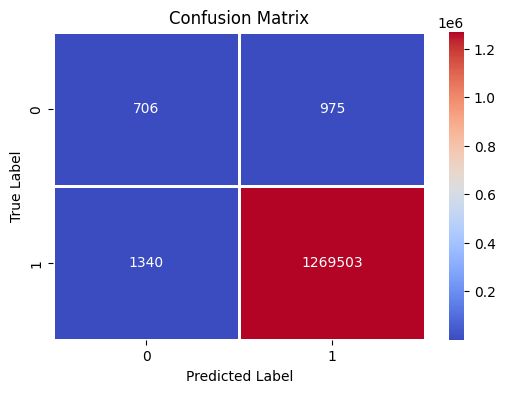


For KNeighborsClassifier, Accuracy score is 0.9994577705410664 

              precision    recall  f1-score   support

       Fraud       0.88      0.69      0.77      1681
    No Fraud       1.00      1.00      1.00   1270843

    accuracy                           1.00   1272524
   macro avg       0.94      0.84      0.88   1272524
weighted avg       1.00      1.00      1.00   1272524



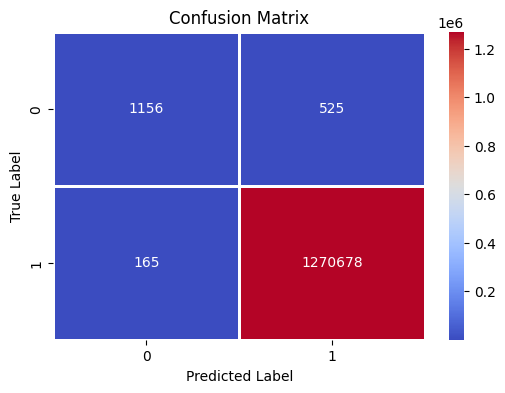


For DecisionTreeClassifier, Accuracy score is 0.9997060959164621 

              precision    recall  f1-score   support

       Fraud       0.89      0.89      0.89      1681
    No Fraud       1.00      1.00      1.00   1270843

    accuracy                           1.00   1272524
   macro avg       0.95      0.94      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



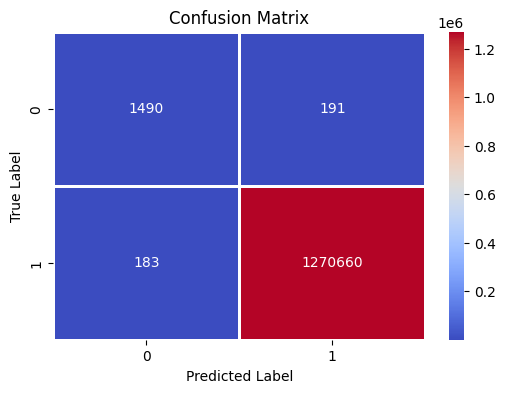


For RandomForestClassifier, Accuracy score is 0.9997068817562577 

              precision    recall  f1-score   support

       Fraud       0.97      0.80      0.88      1681
    No Fraud       1.00      1.00      1.00   1270843

    accuracy                           1.00   1272524
   macro avg       0.99      0.90      0.94   1272524
weighted avg       1.00      1.00      1.00   1272524



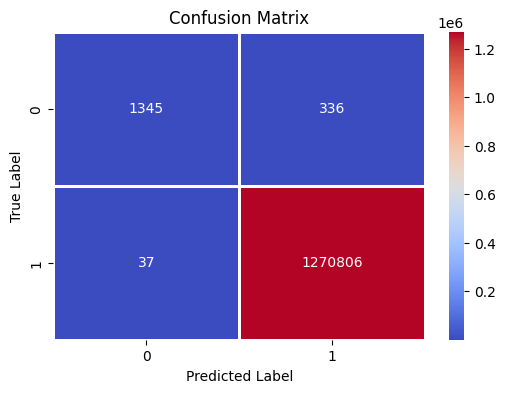

In [94]:
for model in models:
    predictions = trainer(model, x_train, y_train, x_test, y_test)

    # Further analysis
    misclassified_indices = y_test[y_test != predictions].index
    misclassified_samples = x_test.loc[misclassified_indices]

In [88]:
# Importing the library to perform cross-validation
from sklearn.model_selection import cross_validate

# Running the cross-validation on both Decision Tree and Random Forest models; specifying recall as the scoring metric
DC_scores = cross_validate(DC, x_test, y_test, scoring='recall_macro')
RF_scores = cross_validate(RF, x_test, y_test, scoring='recall_macro')

# Printing the means of the cross-validations for both models
print('Decision Tree Recall Cross-Validation:', np.mean(DC_scores['test_score']))
print('Random Forest Recall Cross-Validation:', np.mean(RF_scores['test_score']))

Decision Tree Recall Cross-Validation: 0.9103686626459122
Random Forest Recall Cross-Validation: 0.8792257157858892


In [90]:
import joblib

# Assuming your model is stored in a variable named 'model'
joblib.dump(model, 'model.pkl')


['model.pkl']